In [173]:
import quandl
quandl.ApiConfig.api_key = "y-zCjPnDPkRm_5tTzGRY"

import matplotlib.pylab as plt
import numpy as np 
import pandas as pd

%matplotlib inline

In [174]:
# for Microsoft DATABASE/TICKER
df_microsoft = quandl.get("EOD/MSFT", start_date="2001-01-01", end_date="2017-01-01",  collapse="monthly")

# for S&P500 DATABASE/TICKER
df_sp500 = quandl.get("MULTPL/SP500_REAL_PRICE_MONTH", start_date="2001-01-01", end_date="2017-01-01")

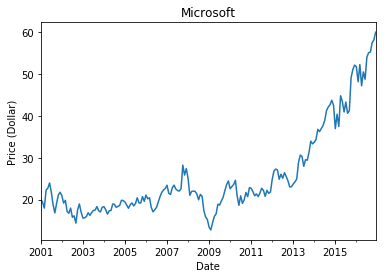

In [181]:
# plot
fig, ax = plt.subplots()
ax.set_title("Microsoft")
ax.set_ylabel("Price (Dollar)")
df_microsoft["Adj_Close"].plot(ax=ax)

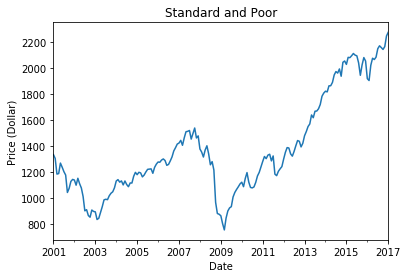

In [180]:
fig, ax = plt.subplots()
ax.set_title("Standard and Poor")
ax.set_ylabel("Price (Dollar)")
df_sp500["Value"].plot(ax=ax)

In [62]:
# compute returns
df_microsoft['daily_returns'] = df_microsoft['Adj_Close'] / df_microsoft['Adj_Close'].shift(1) - 1
# or pct_change()
df_microsoft['daily_returns'] = df_microsoft['Adj_Close'].pct_change()
df_microsoft = df_microsoft.dropna()

In [182]:
df_microsoft.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2001-01-31,63.00,63.75,61.00,61.06,40949400.0,0.0,1.0,20.702125,20.948579,20.044914,20.064631,81898800.0
2001-02-28,59.56,60.08,58.19,59.00,42304200.0,0.0,1.0,19.571723,19.742598,19.121534,19.387704,84608400.0
2001-03-31,55.75,56.19,53.88,54.69,45600800.0,0.0,1.0,18.319737,18.464324,17.705246,17.971416,91201600.0
2001-04-30,68.53,69.06,67.68,67.75,37184100.0,0.0,1.0,22.519311,22.693472,22.239997,22.262999,74368200.0
2001-05-31,69.49,70.38,68.40,69.18,35341300.0,0.0,1.0,22.834772,23.127231,22.476593,22.732905,70682600.0


In [38]:
# compute momentum 1 year momentum 
momentum = np.prod(1 + df_microsoft["returns"].tail(12).values) - 1 

In [64]:
def annualised_sharpe(returns, N=252):
    """
    Calculate the annualised Sharpe ratio of a returns stream 
    based on a number of trading periods, N. N defaults to 252,
    which then assumes a stream of daily returns.

    The function assumes that the returns are the excess of 
    those compared to a benchmark.
    """
    return np.sqrt(N) * returns.mean() / returns.std()

In [164]:
def market_neutral_sharpe(ticker="EOD/MSFT", benchmark="MULTPL/SP500_REAL_PRICE_MONTH"):
    tick = quandl.get(ticker, start_date="2000-12-01", end_date="2017-01-01", collapse="monthly")
    bench = quandl.get(benchmark, start_date="2000-12-01", end_date="2017-01-01")
    tick.index = bench.index[:-1]
    
    # Calculate the percentage returns on each of the time series
    tick['daily_ret'] = tick['Adj_Close'].pct_change()
    bench['daily_ret'] = bench['Value'].pct_change()
    
    # Create a new DataFrame to store the strategy information
    # The net returns are (long - short)/2, since there is twice 
    # trading capital for this strategy
    strat = pd.DataFrame(index=tick.index)
    strat['net_ret'] = (tick['daily_ret'] - bench['daily_ret'])/2.0
    strat.dropna()
    return annualised_sharpe(strat['net_ret'], len(strat))

In [165]:
s = market_neutral_sharpe()